In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def laplace_asymmetricfit(args, x):
#     df = args
    Amp, kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b

In [3]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [4]:
def skewnormfit(args, x):
#     df = args
    Amp, a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [5]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [6]:
def skewnormfit2(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x + d*x*x

In [7]:
def lstsq_skewnormfit2(args, x, y):
#     print(args, x, y)
    return skewnormfit2(args, x) - y

In [8]:
def lognormfit(args, x):
#     df = args
    Amp, s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return Amp*rv.pdf(x) + b + c*x

In [9]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [10]:
def normfit(args, x):
#     df = args
    Amp, loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x +c*x*x

In [11]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [12]:
def normfit2(args, x):
#     df = args
    Amp, loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [13]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [14]:
def halfnormfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [15]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [16]:
def halfnormfit2(args, x):
#     df = args
    Amp, scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return Amp*rv.pdf(x) + a + b*x

In [17]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [18]:
def halfcauchyfit(args, x):
#     df = args
    Amp, scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return Amp*rv.pdf(x) + a + b*x + c*x*x

In [19]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [20]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [21]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [22]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [23]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [24]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Inbending DVCS

In [25]:
parent_epg = "/Volumes/Extreme SSD/Feb2022/SimtoDat/v4.2/inb/epg/"
epg_4397 = pd.read_pickle(parent_epg + "4397" + "_epg.pkl")
epg_4076 = pd.read_pickle(parent_epg + "4076" + "_epg.pkl")

In [26]:
dvcsSimInb = epg_4397
bkgSimInb = epg_4076

In [27]:
dvcsSimInb = dvcsSimInb.loc[dvcsSimInb.Ge>2]
bkgSimInb = bkgSimInb.loc[bkgSimInb.Ge>2]

## CD cuts

In [28]:
dvcsSimInbFD = dvcsSimInb.loc[dvcsSimInb.config == 1]
bkgSimInbFD = bkgSimInb.loc[bkgSimInb.config == 1]

In [29]:
contInbCDFT = .0040597266707579184
contInbCD = 0.13554782386935704
contInbFD = 0.3804839519140771
contOutbCDFT = 0.005652963491001403
contOutbCD = 0.21805902894791315
contOutbFD = 0.5115950737954632

In [30]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 2*scale
        ub_opt = loc + 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 1986.6255367006386 94
0.0007287038893367681 143.79454842937497 94
[ 2.61211576e-01  2.23429032e-02  6.06460315e-02  2.34015041e+00
  3.04298260e+00 -3.24377547e+01] -0.10220881797017176 0.14689462427566188 0.0007287038893367681
0.3106186190597957 100.24448106992634 94
[ 1.22621798e-01  1.98320905e-02  4.42103702e-02  3.92605951e+00
  6.64987733e+00 -9.70200634e+01] -0.07096490916895402 0.11062909025338716 0.3106186190597957
0.325858421559461 99.63402870849968 94
[ 2.13237857e-01  1.77111933e-02  4.80327200e-02  4.52195734e+00
  7.86204481e+00 -8.79081083e+01] -0.08093595305175472 0.1163583396767607 0.325858421559461
0.07547060995615895 114.34283525403728 94
0.439421596690603 95.4311291120612 94
[ 1.25446192e-01  1.88227863e-02  4.20977632e-02  4.77755697e+00
  8.60397247e+00 -1.25338253e+02] -0.06763544897988924 0.10528102151798045 0.439421596690603
0.16015160583081633 107.57046152125758 94
0.37805535428292225 97.63968372595461 94
0.8598650307865922 79.35750496011376 94
[7.96805868

In [31]:
len(dvcsSimInbFD)

271848

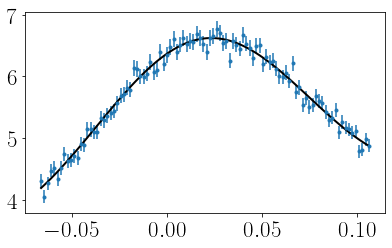

In [32]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [33]:
print(lb_opt, ub_opt)

-0.11127149373610556 0.1486430780414506


In [34]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_ep<0.149)&(dvcsSimInbFD.MM2_ep>-0.111)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_ep<0.149)&(bkgSimInbFD.MM2_ep>-0.111)]

In [35]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.908, 0.244, -0.471, 0.526, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 2*scale
        ub_opt = loc + 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 28695.171110449042 94
0.3514509720663914 98.63947046555873 94
[ 0.33699444  0.96352528  0.25883038 -0.20280381  1.28990124 -0.50926495] 0.4319526812973603 1.495097888513766 0.3514509720663914
0.03074587333204093 121.24851786106599 94
0.15600652873810783 107.82828720399111 94
0.2113455690052246 104.71428094284815 94
0.082043852408901 113.64521307745407 94
0.12329068698292311 110.06250467984638 94
0.15256432120333008 108.04616271844228 94
0.08294789250365697 113.55281796093907 94
0.14647521608830305 108.44045225394707 94


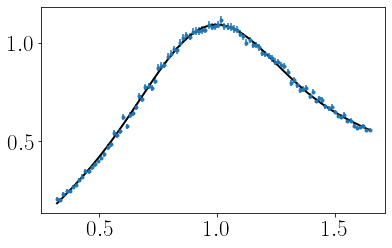

In [36]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [37]:
print(lb_opt, ub_opt)

0.4458645320682868 1.4811860377428396


In [38]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MM2_eg<1.481)&(dvcsSimInbFD.MM2_eg>0.446)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MM2_eg<1.481)&(bkgSimInbFD.MM2_eg>0.446)]

In [39]:
pvalue_opt = -1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(-0.8, 0.9, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.ME_epg, bins = np.linspace(-0.8, 0.9, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0.1, 0.14, 0.0001, 0.1, -0.1]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = loc - scale#norm.ppf(0.02, loc = loc, scale = scale)
    ub = loc + scale#norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 2*scale
        ub_opt = loc + 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 233945.43876294146 14
[ 1.75780877  0.10727343  0.30924672 -0.65081339 -0.17970499  0.91024147] -0.2019732856966624 0.416520144899692 0.0


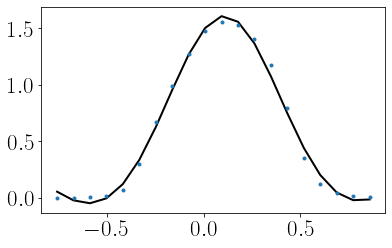

In [40]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [41]:
print(lb_opt, ub_opt)

-0.5112200009948397 0.7257668601978692


In [42]:
len(dvcsSimInbFD)

106100

In [43]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.ME_epg<0.726)&(dvcsSimInbFD.ME_epg>-0.511)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.ME_epg<0.726)&(bkgSimInbFD.ME_epg>-0.511)]

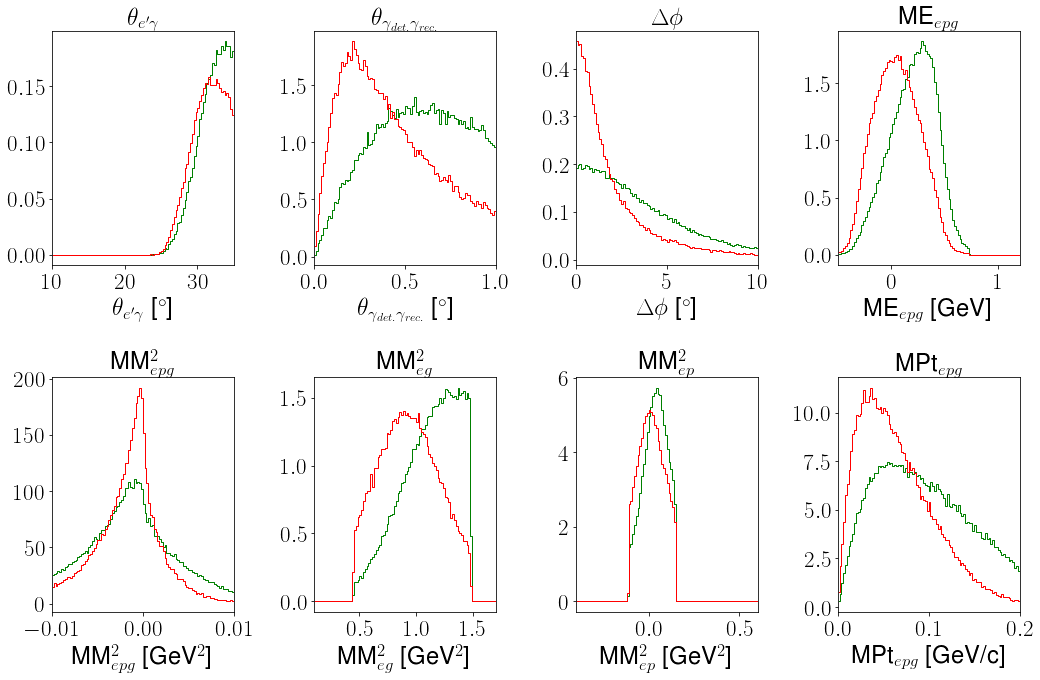

<Figure size 432x288 with 0 Axes>

In [44]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD[varstoplot[ind]], bins, density = True)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvpi0, where='mid',color='g', linewidth=1)
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [45]:
pvalue_opt = -0.1
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(0, 10, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coplanarity, bins = np.linspace(0, 10, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.8, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp,  scale, a, b, c  = params
#     lb = min(halfnorm.ppf(0.1, loc = loc, scale = scale), -0.01)
#     ub = max(halfnorm.ppf(0.9, loc = loc, scale = scale), 0.003)
    lb = 0#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = 9#max(halfnorm.ppf(0.9, scale = scale), 9)
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = 2*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

1.1102230246251565e-16 257.66650253453525 95
[ 0.19993799  1.0764489   0.21322274 -0.04114871  0.00217586] 0 9 1.1102230246251565e-16
3.123356533407673e-07 180.20244527884176 95
[ 0.18689018  1.05621788  0.22723296 -0.04591188  0.00258214] 0 9 3.123356533407673e-07
3.1232232977629337e-07 180.20261770677374 95
3.1232232977629337e-07 180.20261770677374 95
3.1232232977629337e-07 180.20261770677374 95
3.1232232977629337e-07 180.20261770677374 95
3.1232232977629337e-07 180.20261770677374 95
3.1232232977629337e-07 180.20261770677374 95
3.1232232977629337e-07 180.20261770677374 95
3.1232232977629337e-07 180.20261770677374 95


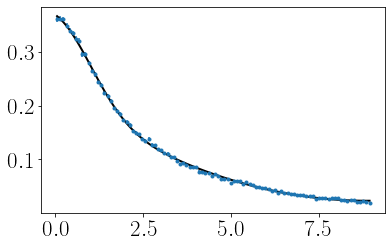

In [46]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.plot(bincenters_opt, skewnormfit([0.6, -2, 0, 0.003, 0, 0, 0], bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [47]:
limit = 8.3
2*np.sqrt(sum(dvcsSimInbFD.loc[dvcsSimInbFD.coplanarity<limit].coplanarity**2)/len(dvcsSimInbFD.loc[dvcsSimInbFD.coplanarity<limit]))

5.3371884692773195

In [48]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coplanarity<5.337)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coplanarity<5.337)]

In [49]:
np.linspace(3, 8.5, 12)

array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5])

In [50]:
def lstsq_normfit3(args, x, y):
#     print(args, x, y)
    return normfit3(args, x) - y
def normfit3(args, x):
#     df = args
    loc, scale, a, b = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x

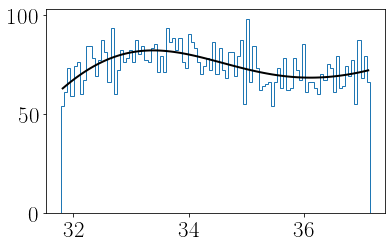

3.0 [32.49127841  2.09569139 -1.1451135   0.03529429] 0.678890738279196
32.49127841217985 26.204204256275688 29.05593791621034


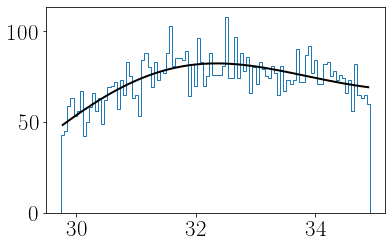

3.5 [ 3.14595678e+01  2.37352244e+00 -7.39898578e-01  2.47377744e-02] 0.2970419763244756
31.459567841661737 24.339000523281243 29.23987210699113


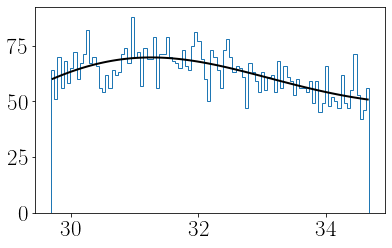

4.0 [ 3.06501751e+01  2.46153963e+00 -4.29394966e-01  1.58281643e-02] 0.8735794735224642
30.650175095270374 23.265556219294076 29.361990198269172


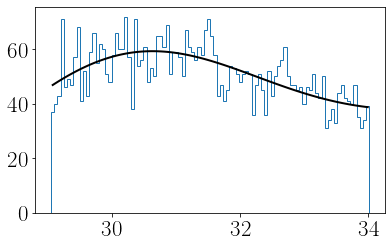

4.5 [ 3.01471506e+01  2.11312294e+00 -5.60093824e-01  1.99028861e-02] 0.15559781117682703
30.147150589235277 23.807781756168193 28.46686911662514


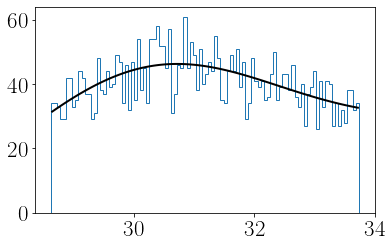

5.0 [ 3.01710206e+01  2.23466734e+00 -5.35228018e-01  1.90304247e-02] 0.28628533311889914
30.171020632150412 23.4670185996062 28.565336579562228


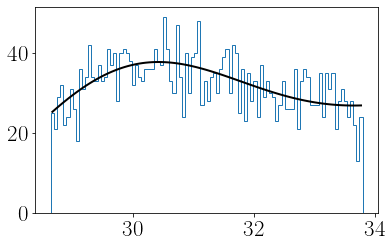

5.5 [29.81882563  1.97155844 -0.87997239  0.03002993] 0.3088363857561752
29.81882562672194 23.90415029293338 27.178908450399913


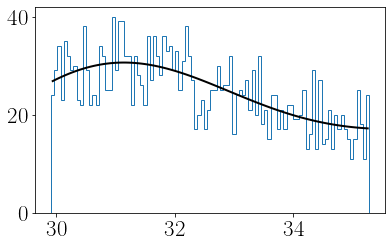

6.0 [ 3.07649689e+01  2.14976935e+00 -4.19122573e-01  1.49354785e-02] 0.16538308354567988
30.764968919861158 24.31566087579354 29.507601201665757


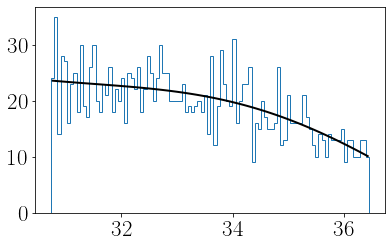

6.5 [ 3.47082420e+01  3.19569228e+00  1.09050805e+00 -3.03816377e-02] 0.629610789871903
34.70824197244188 25.12116513575054 37.979766137324525


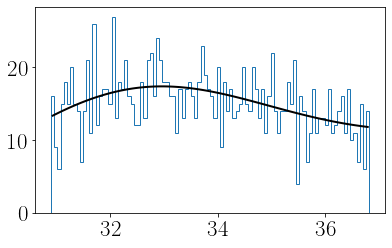

7.0 [ 3.23538483e+01  2.59261174e+00 -4.04411666e-01  1.35903869e-02] 0.023746081389677265
32.35384825083324 24.5760130208021 31.14061325327166


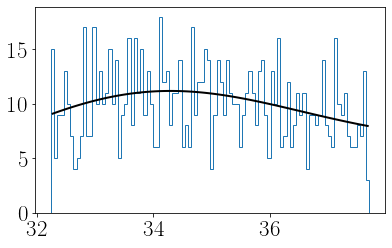

7.5 [ 3.38081738e+01  2.72870235e+00 -2.62760823e-01  9.40132307e-03] 0.0037142596671565498
33.808173755985045 25.622066693868163 33.01989128565324


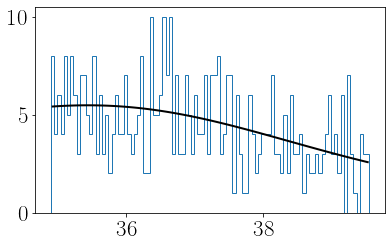

8.0 [ 3.58358163e+01  2.52731573e+00  4.50727578e-01 -9.62993458e-03] 0.0
35.83581633228759 28.253869138371883 37.1879990658794


<ipython-input-51-184a320238c3>:30: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)


In [51]:
GpEdges = np.linspace(3, 8.5, 12)
GeEdges = GpEdges
GpArray = []
lbs = []
ubs = []
for i in range(len(GpEdges)-1):
    GpMin = GpEdges[i]
    GpMax = GpEdges[i+1]
    var = dvcsSimInbFD.loc[(dvcsSimInbFD.Gp>GpMin)&(dvcsSimInbFD.Gp<GpMax), "coneAngle"]
    hist, bins = np.histogram(var, bins = 100)
    mu = bins[np.argmax(hist)]
    sigma = var.std()
    
    bins = np.linspace(mu-0.5*sigma, mu+1*sigma, 101)
#     if i >3:
#         bins = np.linspace(mu-sigma, mu+0.8*sigma, 101)

    
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist, bins = np.histogram(var, bins = bins)
    dist = hist/np.sum(hist)/np.diff(bins)[0]
    unchist = np.sqrt(hist)
    uncdist = unchist/np.sum(hist)/np.diff(bins)[0]
    params = [mu, sigma, 0, 0]
    res_lsq = least_squares(lstsq_normfit3, params, args=(bincenters, dist))
    plt.hist(var, bins = bins, histtype = 'step')
    
    plt.plot(bincenters, normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0], 'k-', lw=2, label='frozen pdf')
    plt.show()
    chi2fit = np.sum((hist - normfit3(res_lsq.x, bincenters)*np.sum(hist)*np.diff(bincenters)[0])**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    print(GpMin, res_lsq.x ,pvalue)
    print(res_lsq.x[0], res_lsq.x[0]-3*res_lsq.x[1], res_lsq.x[0]+3*res_lsq.x[2])
    GpArray.append((GpMin + GpMax)/2)
    lbs.append(res_lsq.x[0]-2*res_lsq.x[1])
    ubs.append(res_lsq.x[0]+2*res_lsq.x[1])

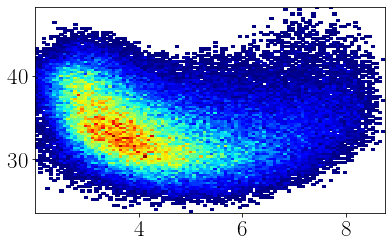

In [52]:
plt.hist2d(dvcsSimInbFD.Ge, dvcsSimInbFD.coneAngle, bins = 100, cmin = 1, cmap = cmap)
plt.show()

In [53]:
def lstsq_polyfit(args, x, y):
    x = np.array(x)
    return np.poly1d(args)(x) - y

[ 0.58515676 -5.76477809 49.16487788]
[ 0.51287894 -5.37375025 39.8707775 ]


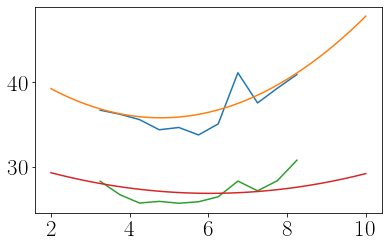

In [54]:
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, ubs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, ubs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.585, -5.765, 49.165])(np.linspace(2, 10, 101)))
print(res_lsq.x)
plt.plot((GeEdges[1:]+GeEdges[:-1])/2, lbs)
res_lsq = least_squares(lstsq_polyfit, [0, 0, 0], args=((GeEdges[1:]+GeEdges[:-1])/2, lbs))
plt.plot(np.linspace(2, 10, 101), np.poly1d([0.513, -5.374, 39.871])(np.linspace(2, 10, 101)))
print(res_lsq.x)


In [55]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.coneAngle<np.poly1d([0.585, -5.765, 49.165])(dvcsSimInbFD.Gp))&(dvcsSimInbFD.coneAngle>np.poly1d([0.513, -5.374, 39.871])(dvcsSimInbFD.Gp))]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.coneAngle<np.poly1d([0.585, -5.765, 49.165])(bkgSimInbFD.Gp))&(bkgSimInbFD.coneAngle>np.poly1d([0.513, -5.374, 39.871])(bkgSimInbFD.Gp))]

In [56]:
len(dvcsSimInbFD)

64938

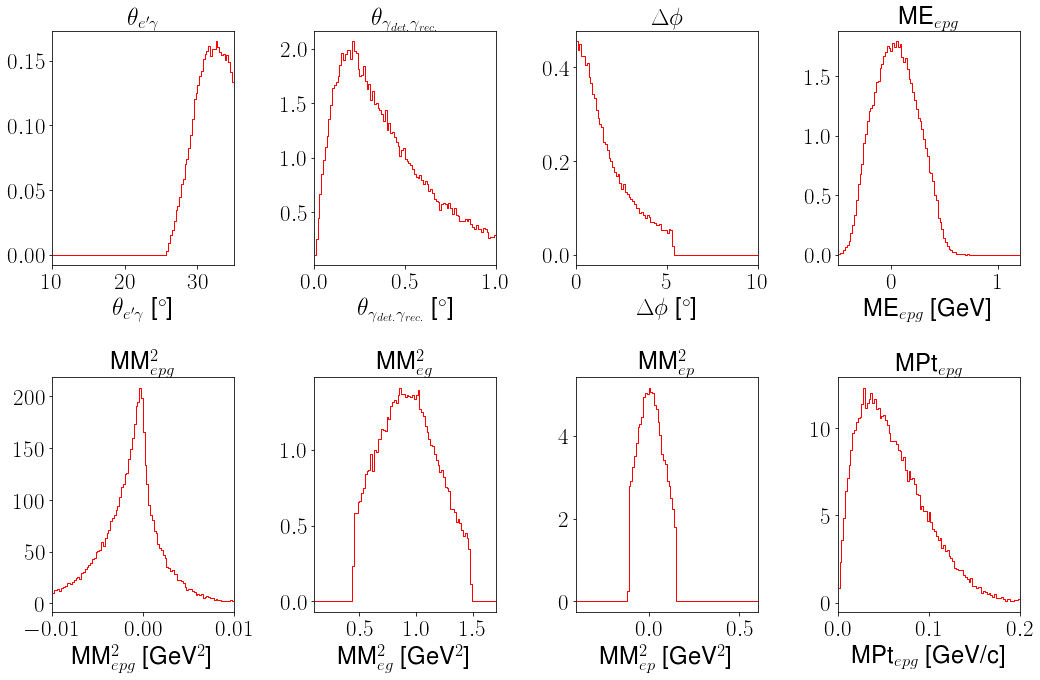

<Figure size 432x288 with 0 Axes>

In [57]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [64]:
pvalue_opt = -0.1
for i in range(0, 2):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(0.005, 0.2, 21))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MPt, bins = np.linspace(0.005, 0.2, 21))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.05, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.15)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+2*scale#norm.ppf(1-0.0013, loc = loc, scale = scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 343.70380835051355 14
[ 1.83936082e+02 -1.20078342e-01  1.39415981e-01 -3.61436557e+02
  2.68807858e+03 -5.34376625e+03] 0.005 0.15 0.0
0.0013254992153934886 140.60095991625397 94
[ 1.89445904e+02 -1.08463397e-01  1.18490432e-01 -4.18933386e+02
  3.84659498e+03 -9.56589937e+03] 0.005 0.15 0.0013254992153934886


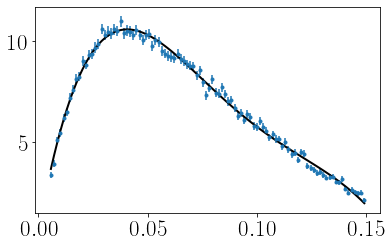

In [65]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [66]:
params_opt

array([ 1.89445904e+02, -1.08463397e-01,  1.18490432e-01, -4.18933386e+02,
        3.84659498e+03, -9.56589937e+03])

In [67]:
print(ub_opt)

0.12851746746318957


In [68]:
dvcsSimInbFD = dvcsSimInbFD.loc[(dvcsSimInbFD.MPt<0.129)]
bkgSimInbFD = bkgSimInbFD.loc[(bkgSimInbFD.MPt<0.129)]

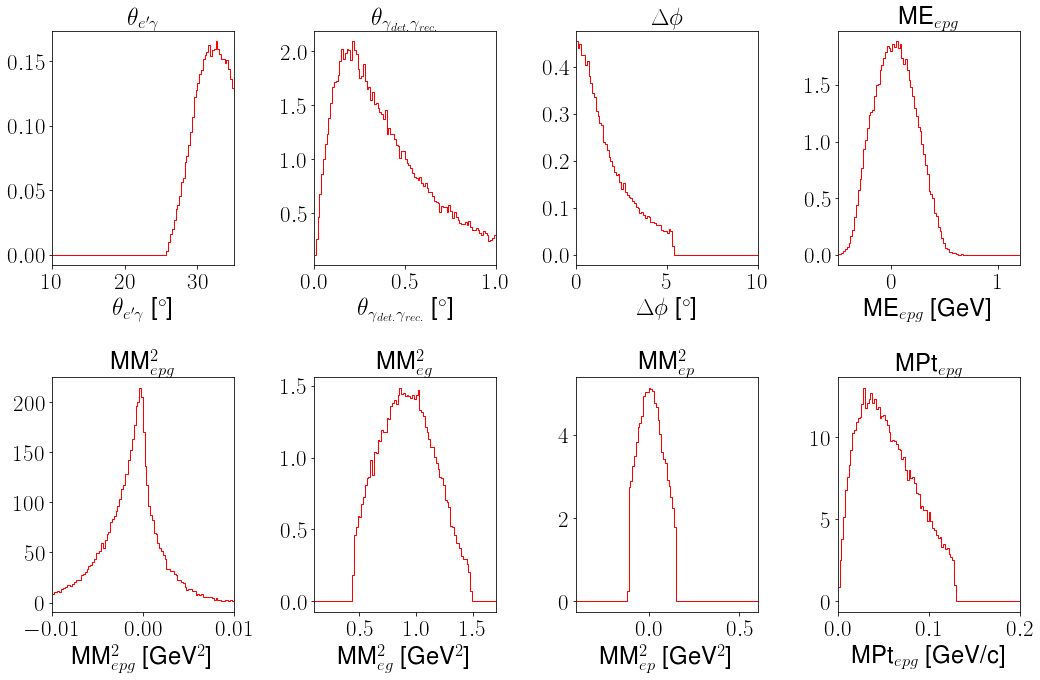

<Figure size 432x288 with 0 Axes>

In [69]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [71]:
pvalue_opt = -0.1
for i in range(0, 1):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(0.05, 1.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.reconGam, bins = np.linspace(0.05, 1.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params =[1, 0.01, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimInbFD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contInbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contInbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contInbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contInbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    Amp, loc, scale, a, b, c = params
    lb = 0.005#min(halfnorm.ppf(0, a=a, loc = loc, scale = scale), -0.003)
    ub = max(norm.ppf(0.9, loc = loc, scale = scale), 0.6)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0#halfnorm.ppf(0, a=a, loc = loc, scale = scale)
        ub_opt = loc+2*scale
#         print(ub_opt, loc + 2*scale)
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 871.2896068672139 94
[10.53829261 -0.12555665  0.52176478 -7.25387888 10.80042701 -3.99131758] 0.005 0.6 0.0


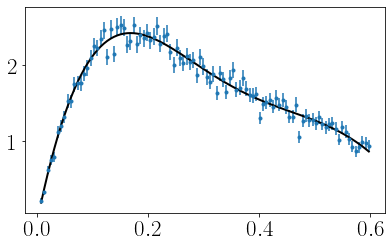

In [141]:
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [142]:
print(ub_opt)

0.4326894066291417


In [143]:
dvcsSimInbFD = dvcsSimInbFD.loc[dvcsSimInbFD.reconGam<0.433]
bkgSimInbFD = bkgSimInbFD.loc[bkgSimInbFD.reconGam<0.433]

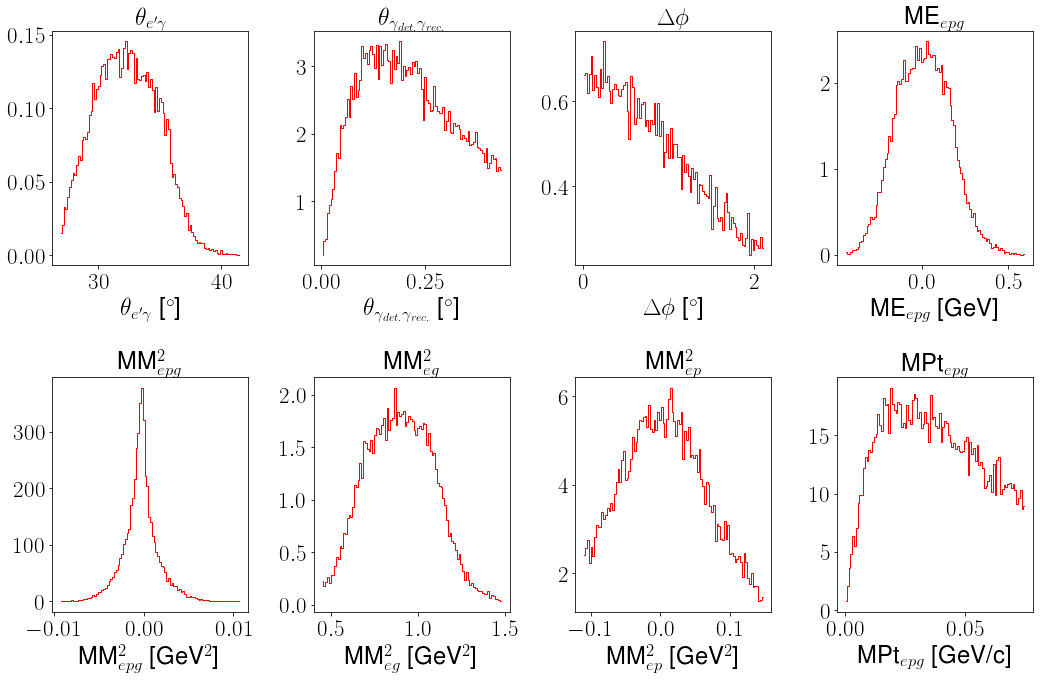

<Figure size 432x288 with 0 Axes>

In [144]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = 100#np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimInbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
#         axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/inbending1.pdf")
plt.show()
plt.clf()

In [145]:
len(dvcsSimInbFD)

20885

In [146]:
print(dvcsSimInbFD.MM2_epg.mean()+2*dvcsSimInbFD.MM2_epg.std(), dvcsSimInbFD.MM2_epg.mean()-2*dvcsSimInbFD.MM2_epg.std())

0.0036089202685948406 -0.004273248638992314
